In [1]:
import os
%matplotlib widget
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import numpy as np

In [5]:
# Input/output options
args = WorkflowInputs(
    images=["./1740905133.811608_GA_christa.jpg"],
    names="image",
    result="example_results_oneimage_file.json",
    outdir=".",
    writeimg=False,
    debug="plot",
    sample_label="christa_0%_plant2_18"
    )

In [55]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 0.2
pcv.params.text_thickness = 20

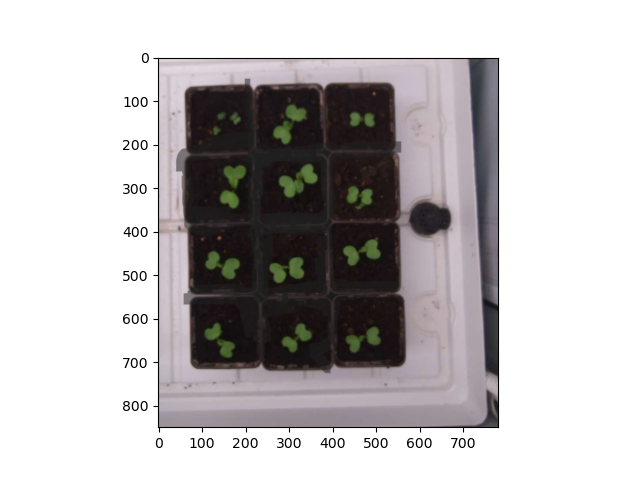

In [56]:
img, path, filename = pcv.readimage(filename=args.image)

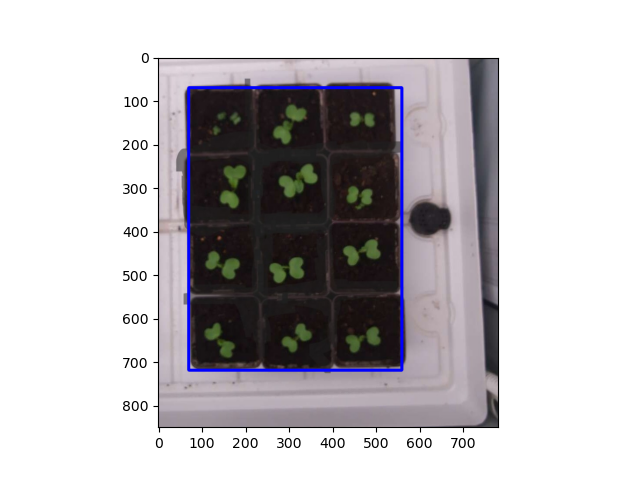

In [57]:
# Crop image
# X is the right X-axis, 
# crop_img_m_image = pcv.crop(img=img, x=80, y=40, h=630, w=600)
crop_img_right_image = pcv.crop(img=img, x=70, y=70, h=650, w=490)


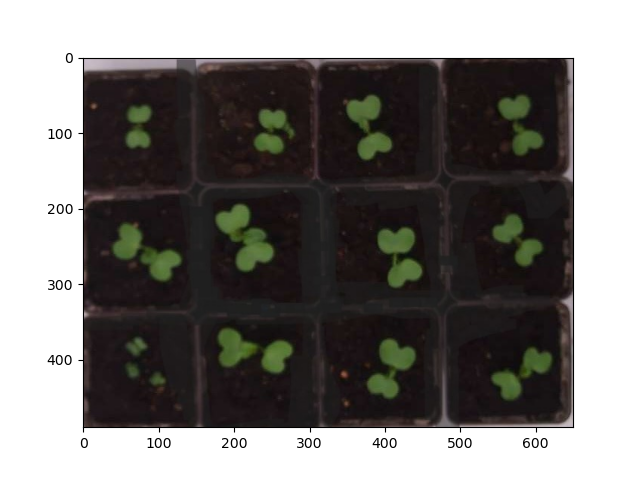

In [58]:
# # Rotate image
rotate_img_right = pcv.transform.rotate(crop_img_right_image, 90, False)
# rotate_img_m = pcv.transform.rotate(crop_img_m_image, 90, False)

In [59]:

# shifted_image = pcv.shift_img(crop_img,10, 'top')
# # img1 = shifted_image

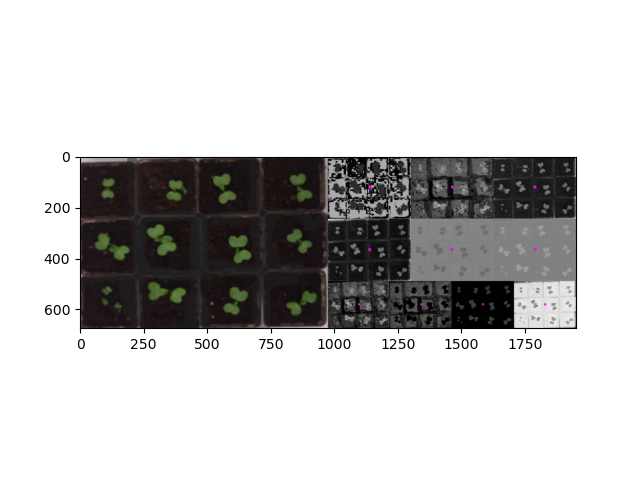

In [60]:
# colorspace_img = pcv.visualize.colorspaces(rgb_img=rotate_img_m)
colorspace_img_right = pcv.visualize.colorspaces(rgb_img= rotate_img_right)

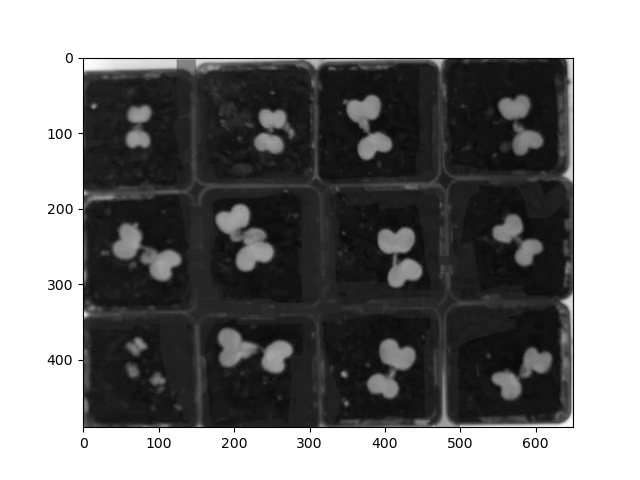

In [61]:
# l_channel = pcv.rgb2gray_lab(rgb_img=rotate_img_m, channel="l")
l_channel = pcv.rgb2gray_lab(rgb_img=rotate_img_right, channel="l")

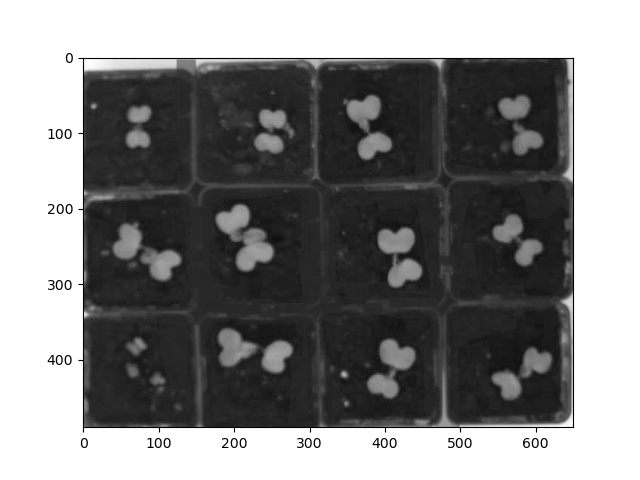

In [19]:
# v_channel = pcv.rgb2gray_hsv(rgb_img=rotate_img_m, channel='v')
v_channel = pcv.rgb2gray_hsv(rgb_img=rotate_img_right, channel='v')

In [312]:
hist = pcv.visualize.histogram(img=l_channel, bins=25)

alt.Chart(...)

In [313]:
hist = pcv.visualize.histogram(img=v_channel, bins=25)

alt.Chart(...)

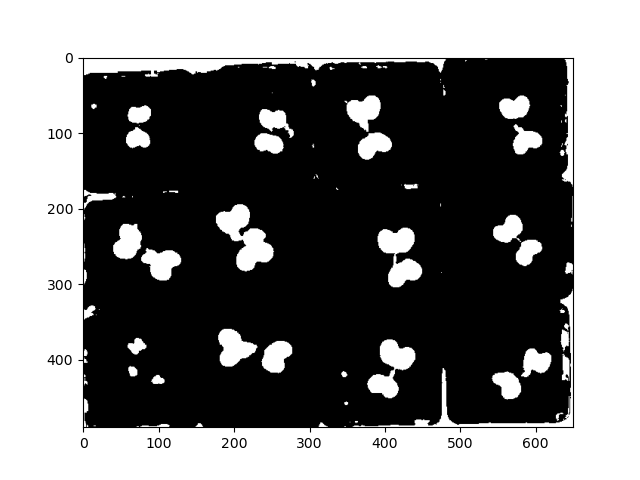

In [17]:
# binary threshold 
l_thresh = pcv.threshold.binary(gray_img=l_channel, threshold=65, object_type='light')

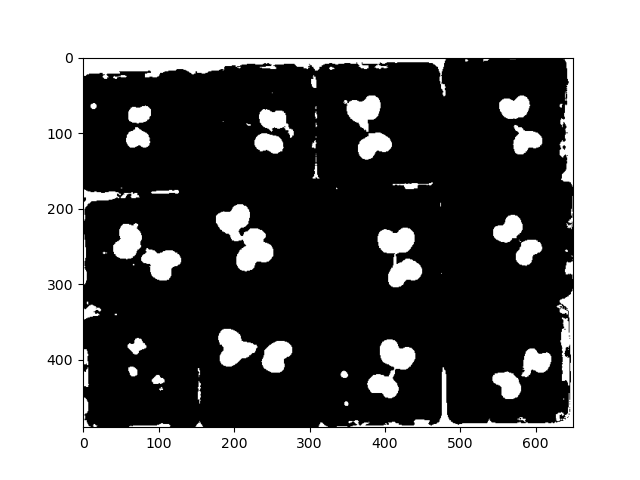

In [20]:
v_thresh = pcv.threshold.binary(gray_img=v_channel, threshold=65, object_type='light')

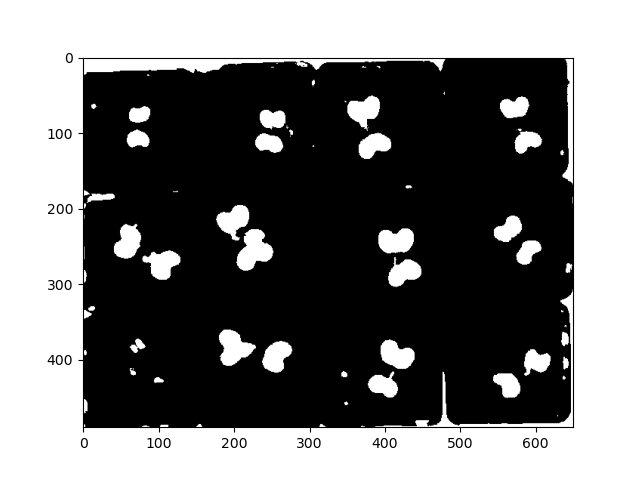

In [62]:
thresh1 = pcv.threshold.dual_channels(rgb_img = rotate_img_right, x_channel = "l", y_channel = "v", points = [(40,80),(40,80)],above=True)

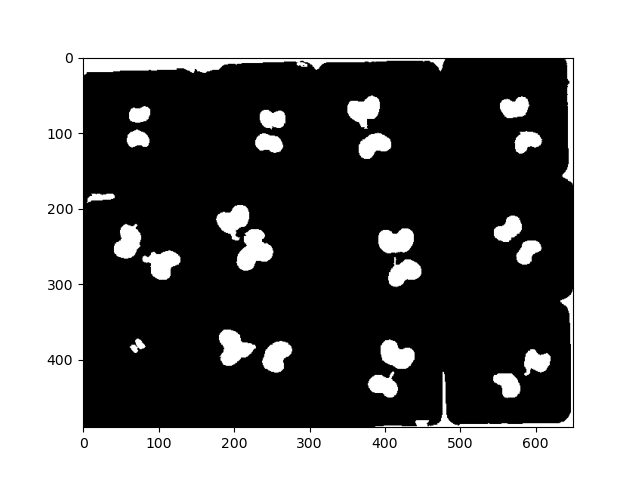

In [63]:
# Fill in small objects if the above threshold looks like there are "holes" in the leaves
a_fill_image = pcv.fill(bin_img=thresh1, size=150)


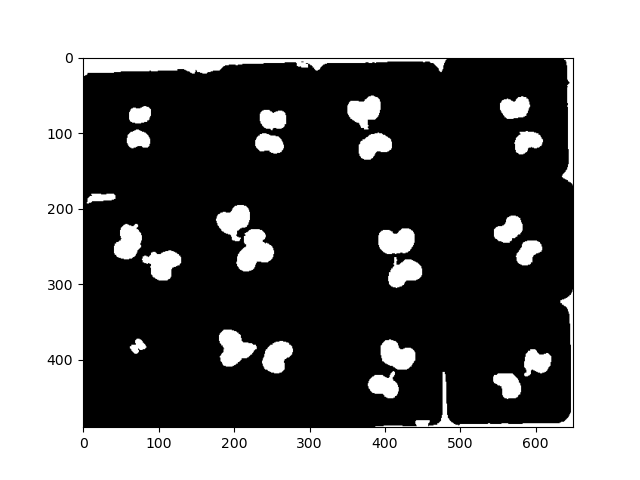

array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [73]:
pcv.dilate(gray_img=a_fill_image, ksize=2, i=1)

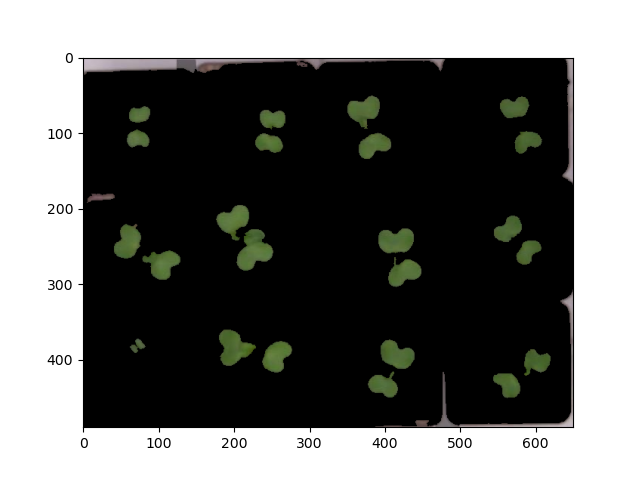

In [74]:
# Mask images
mask = pcv.apply_mask(img=rotate_img_right, mask=a_fill_image, mask_color='black')

In [65]:
#  # Find objects in the binary image
# # Make a grid of ROIs
# roi_objects_m = pcv.roi.multi(img=mask, coord=(60,100), radius=60, 
#                                       spacing=(170, 190), nrows=3, ncols=4)

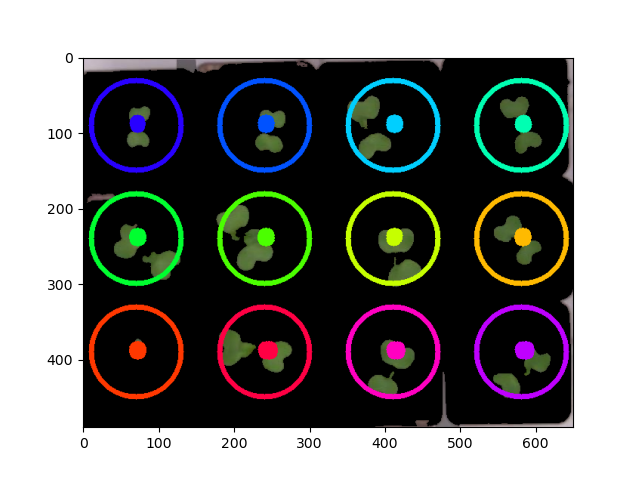

In [66]:
 # Find objects in the binary image
# Make a grid of ROIs
roi_objects =pcv.roi.multi(img=mask, coord=(70,90), radius=60, 
                                      spacing=(170, 150), nrows=3, ncols=4)

In [ ]:
# Specify a list of coordinates of desired ROIs 
rois2 = pcv.roi.multi(img=mask, coord=[(70,70), (150, 150), (150,150)], radius=20)


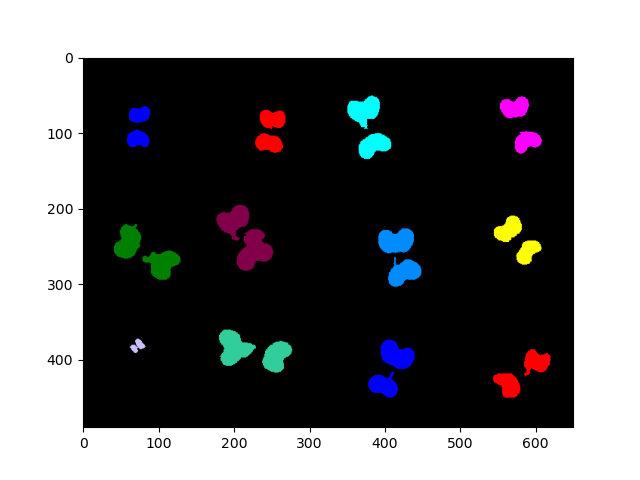

In [67]:
labeled_mask, num_plants = pcv.create_labels(mask=a_fill_image, rois=roi_objects, roi_type="partial")


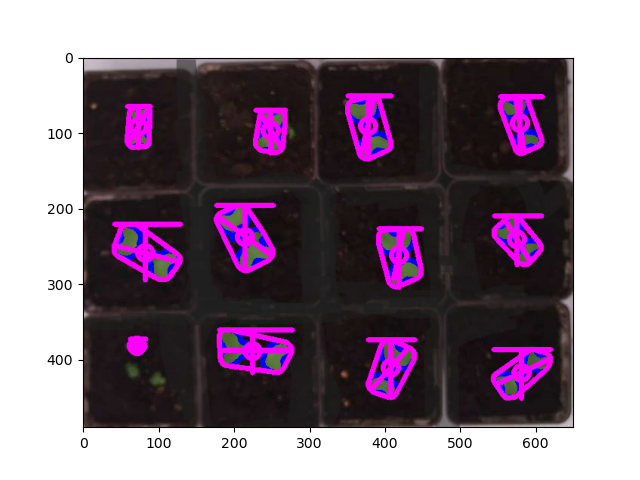

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[198, 186, 198],
        [198, 186, 198],
        [200, 188, 200],
        ...,
        [163, 159, 170],
        [165, 159, 170],
        [169, 161, 172]],

       [[198, 186, 198],
        [198, 186, 198],
        [200, 188, 200],
        ...,
        [164, 160, 171],
        [165, 159, 170],
        [167, 159, 170]],

       ...,

       [[ 90,  90, 106],
        [ 74,  74,  90],
        [ 67,  70,  85],
        ...,
        [195, 187, 197],
        [195, 187, 197],
        [195, 186, 196]],

       [[106, 105, 121],
        [ 83,  83,  99],
        [ 72,  72,  88],
        ...,
        [195, 186, 196],
        [195, 186, 196],
        [195, 186, 196]],

       [[117, 116, 132],
        [ 95,  95, 111],
        [ 74,  74,  90],
        ...,
        [195, 186, 196],
        [195, 186, 196],
        [195, 186, 196]]

In [32]:
pcv.analyze.size(img=rotate_img_right, labeled_mask=labeled_mask, n_labels=num_plants, label="plant")


In [322]:
# Write custom data to results file
pcv.outputs.save_results(filename=args.result, outformat="json")